# Biomatemática
## Uma análise de competição interespecífica de duas espécies de peixes em uma represa com poluentes

<a href="https://colab.research.google.com/github/CarlosAntonioFreitasSilva/biomatematica/blob/main/projeto_1_2023-06.ipynb" target='_blank'> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><br>

Autores: Carlos Antônio, Robson Aguiar & Tuanny Maciel

**Resumo:** Neste projeto elaboramos um modelo de interação entre duas espécies de peixes em uma represa, na qual entra uma certa quantidade de produto tóxico, que afetará, de modo letal, tais espécies, em diferentes proporções.  Além disso, também foi feita a análise de um modelo com base em uma modificação, considerando a retirada de peixes da represa com rede para a comercialização. A partir dos modelos construídos e analisados, buscou-se compreender de que maneira é possível controlar a entrada desse produto tóxico na represa, de volume $V,$  conforme o fluxo $F$ de água,  a fim de que as populações de peixes não fossem prejudicadas.

Consideremos uma represa de volume $V$ e com fluxo $F$ na qual se criam comercialmente duas espécies de peixes, digamos  $A$ e $B.$ Consideremos ainda que, nessa represa, a capacidade de suporte total para as duas populações é $K.$ Isto é, essas duas espécies competem pelo alimento, pela energia e pelo espaço. Suponha ainda que, a cada unidade de tempo considerada, uma quantidade q de um produto tóxico entra nesse meio afetando de modo letal as espécies, nas proporções $r_1$    e $r_2,$  respectivamente. 
Sejam $A_n, B_n$  a população da espécie $A$ e $B,$ respectivamente, no período n e consideremos $\lambda_A$ e $\lambda_B$ as taxas de crescimento de $A$ e $B,$ respectivamente. Consideremos ainda, que $C_n$ representa a concentração de poluente no período $n.$

Sendo assim, consideremos os parâmetros $a$ e $b,$ onde:
- $a$ representa o quanto a presença da espécie $A$ prejudica a espécie $B$
- $b$ representa o quanto a presença da espécie $B$ prejudica a espécie $A$

O fluxo de água da represa contribui para o decrescimento da poluição a cada período, cuja taxa é dada por  $F/V.$ Com isso, elaboramos o modelo, fazendo a análise das duas situações, ou seja, sem pesca e com pesca.  

### Sem pesca
$$A_{n+1} = A_n+\lambda_AA_n\left(1-\frac{A_n}{K}\right)-bB_nA_n-r_1C_nA_n$$
$$B_{n+1} = B_n+\lambda_BB_n\left(1-\frac{B_n}{K}\right)-aA_nB_n-r_2C_nB_n$$
$$C_{n+1}=C_n-\frac{F}{V}C_n-dC_n+q$$

### Com pesca

Vamos considerar nesse modelo que exista pesca de peixes a cada k gerações. Assim, definimos $\sigma_1$ e $\sigma_2$ como sendo as taxas que indicam o quanto a pesca prejudica as espécies $A$ e $B,$ respectivamente. Caso não tenha pesca utilizamos $k=0$ e então temos o seguinte modelo:

$$A_{n+1}=\begin{cases}
 A_n+\lambda_AA_n\left(1-\frac{A_n}{K}\right)-bB_nA_n-r_1C_nA_n-\sigma_1A_n, \textrm{ se } n\equiv 1 \textrm{mod} k\\
 A_n+\lambda_AA_n\left(1-\frac{A_n}{K}\right)-bB_nA_n-r_1C_nA_n, \textrm{  caso contrário}
\end{cases}$$

$$B_{n+1}=\begin{cases}
B_n+\lambda_BB_n\left(1-\frac{B_n}{K}\right)-aA_nB_n-r_2C_nB_n-\sigma_2B_n, \textrm{ se } n\equiv 1 \textrm{mod} k\\
B_n+\lambda_BB_n\left(1-\frac{B_n}{K}\right)-aA_nB_n-r_2C_nB_n, \textrm{  caso contrário}
\end{cases}$$

$$C_{n+1}=C_n-\frac{F}{V}C_n-dC_n+q$$

Para os modelos elaborados implementamos o método `competition` que retorna a população de uma espécie $P$ competindo com uma espécie $Q$ tendo o parâmetro opcional `sigma = 0` e o método `contamination` retorna a quantidade de poluentes na represa.

In [1]:
def competition(p_n,lam,k,c_n,b_n,b,r,sigma=0): 
    return p_n+lam*p_n*(1-p_n/k)-b*p_n*b_n-r*c_n*p_n-sigma*p_n  #sigma é o quanto a pesca prejudica a espécie

def contamination(c_n,f,v,d,q):
    return c_n-(f/v)*c_n-d*c_n+q

def contamincao(fluxo,q):
    for i in range (n):
        c.append(contamination(c[i],fluxo,29170,1e-1,q))

def geracoes_sem_pesca(a,b):
    for i in range (n):
        a.append(competition(a[i],0.25,43755,c[i],b[i],2e-8,2e-4)) 
        b.append(competition(b[i],0.20,43755,c[i],a[i],1e-8,1e-4))

def geracoes_com_pesca(a,b):
    for i in range (n):
        a.append(competition(a[i],0.25,43755,c[i],b[i],2e-8,2e-4,0.02))
        b.append(competition(b[i],0.20,43755,c[i],a[i],1e-8,1e-4,0.025))

## Experimentos computacionais

Vamos realizar experimentos considerando os parâmetros a seguir:
- O volume da represa é de 29.170m³
- A geração  $n$ considerada é equivalente a 20 dias
- capacidade de suporte em média é de 3 peixes por metro cúbico, o que nos dá  43.755 para cada espécie

- $A_0 = 3000,$ $B_0 = 3000$ e $C_0 = 0$
- $\lambda_A = 0.25$
- $\lambda_b = 0.20$
- $n=100.$

Vamos analisar de que modo podemos controlar a quantidade q de poluentes jogada no rio para um determinado fluxo, a fim de que a represa fique com a quantidade de poluentes abaixo de $400 g/m^3,$ conforme permitido.


In [2]:
n = 100
t=[0]
for i in range (n):
    t.append(i+1)

### Análise 1

Nessa análise vamos considerar que ocorra pesca em todas as gerações considerando um fluxo de $4000 m^3$ por geração. Assim, testamos os valores de `q` no código a seguir:


In [3]:
c = [0]    #poluente
A = [3000] #peixe A
B = [3000] #peixe B
A_pesca = [3000] #população de peixe A com pesca
B_pesca = [3000] #população de peixe B com pesca
fluxo = 4000
q = 94 

contamincao(fluxo,q)
geracoes_sem_pesca(A,B)
geracoes_com_pesca(A_pesca,B_pesca)

print("Quantidade máxima de poluentes: " + str(max(c)))

Quantidade máxima de poluentes: 396.4117391925946


Para que a contaminação esteja sempre abaixo de $400g/m^3$ concluímos que a cada gerção so pode ser jogado no máximo $94g/m^3$ de poluentes, como mostra o gráfico gerado pelo código seguir:

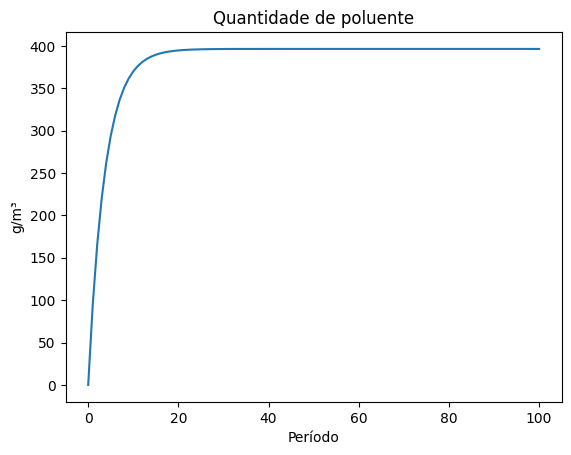

In [4]:
from matplotlib import pyplot as plt

plt.plot(t,c, label="poluente")
plt.xlabel("Período")
plt.ylabel("g/m³")
plt.title("Quantidade de poluente")
plt.show()

Podemos observar o comportamento das populações de peixes nos gráficos gerados pelo codigo abaixo:

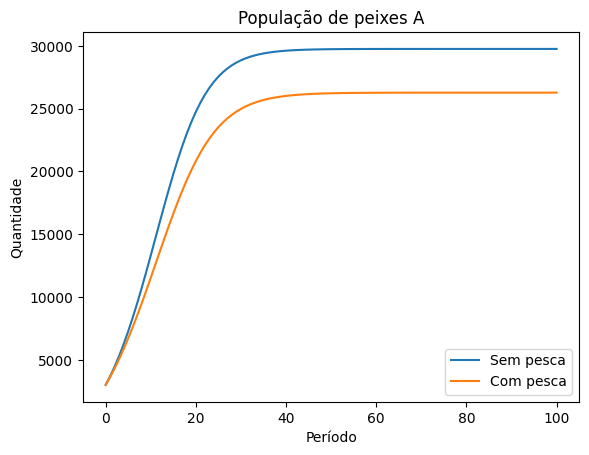

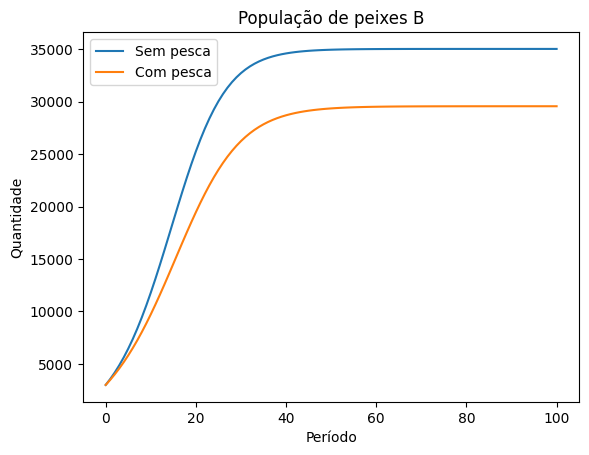

In [5]:
plt.plot(t,A,label="Sem pesca")
plt.plot(t,A_pesca,label="Com pesca")
plt.xlabel("Período")
plt.ylabel("Quantidade")
plt.title("População de peixes A")
plt.legend()
plt.show()

plt.plot(t,B, label="Sem pesca")
plt.plot(t,B_pesca, label="Com pesca")
plt.xlabel("Período")
plt.ylabel("Quantidade")
plt.title("População de peixes B")
plt.legend()
plt.show()

### Análise 2

Nessa análise vamos considerar que ocorra pesca em todas as gerações considerando um fluxo de $55000 m^3$ por geração. Assim, testamos os valores de `q` no código a seguir:

In [6]:
c=[0]   #poluente
A=[3000] #peixe A
B=[3000] #peixe B
A_pesca=[3000] #população de peixe A com pesca
B_pesca=[3000] #população de peixe B com pesca
fluxo = 55000
q = 803

contamincao(fluxo,q)
geracoes_sem_pesca(A,B)
geracoes_com_pesca(A_pesca,B_pesca)

Quantidade máxima de poluentes: 803.0


Para que a contaminação se estabilize em $400g/m^3$ concluímos que a cada gerção so pode ser jogado no máximo $803g/m^3$ de poluentes, como mostra o gráfico gerado pelo código seguir:

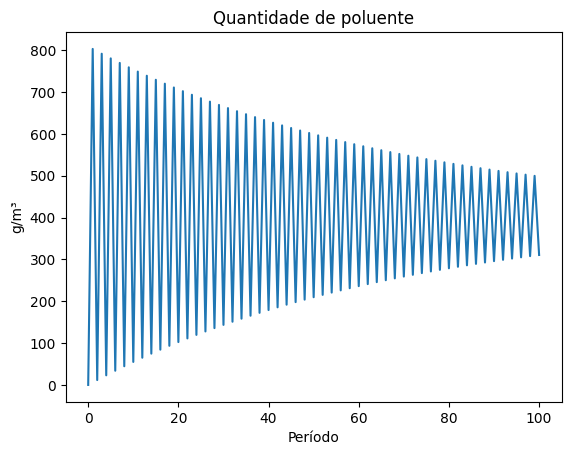

In [7]:
plt.plot(t,c, label="poluente")
plt.xlabel("Período")
plt.ylabel("g/m³")
plt.title("Quantidade de poluente")
plt.show()

A estabalização da contaminação ocorre de forma instável.  A dinâmica populacional de cada uma das espécies pode ser observada nos gráficos a seguir:

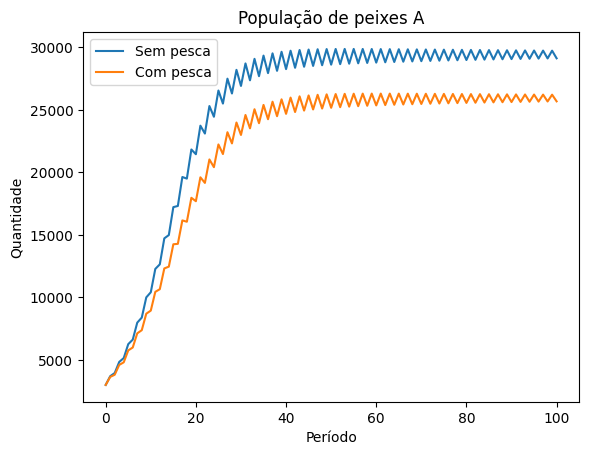

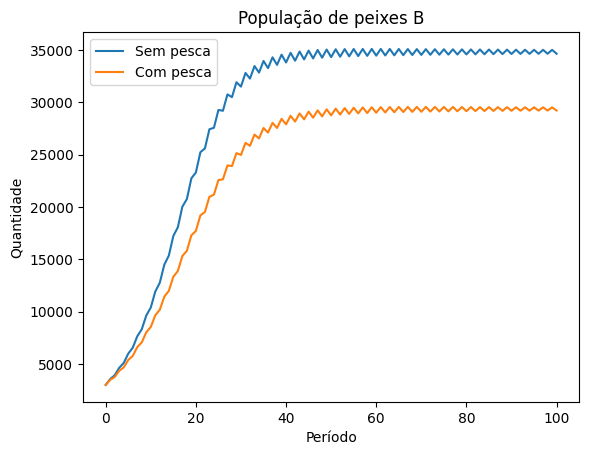

In [8]:
plt.plot(t,A,label="Sem pesca")
plt.plot(t,A_pesca,label="Com pesca")
plt.xlabel("Período")
plt.ylabel("Quantidade")
plt.title("População de peixes A")
plt.legend()
plt.show()

plt.plot(t,B, label="Sem pesca")
plt.plot(t,B_pesca, label="Com pesca")
plt.xlabel("Período")
plt.ylabel("Quantidade")
plt.title("População de peixes B")
plt.legend()
plt.show()

### Análise 3

Vamos agora analisar a dinâmica populacional das espécies considerando que a pesca ocorra a cada 3 gerações. Para isso implementamos o código a seguir:

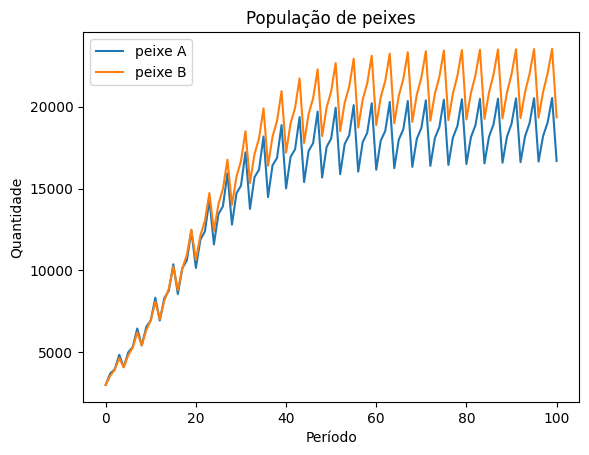

In [10]:
c = [0]   #poluente
a =[3000] #peixe A
b = [3000] #peixe B
a_pesca = [3000] #população de peixe A com pesca
b_pesca = [3000] #população de peixe B com pesca
n = 100
t = [0]

#com pesca i=3,7,11,15,19,23 i=3+4k
for i in range (n):
    c.append(contamination(c[i],55000,29170,1e-1,803))
    if((i-3)%4==0): #com pesca
        a.append(competition(a[i],0.25,43755,c[i],b[i],2e-8,2e-4,0.22))
        b.append(competition(b[i],0.20,43755,c[i],a[i],1e-8,1e-4,0.22))
    else: #sem pesca
        a.append(competition(a[i],0.25,43755,c[i],b[i],2e-8,2e-4))
        b.append(competition(b[i],0.20,43755,c[i],a[i],1e-8,1e-4))
    t.append(i+1)

plt.plot(t,a,label="peixe A")
plt.plot(t,b, label="peixe B")
plt.xlabel("Período")
plt.ylabel("Quantidade")
plt.title("População de peixes")
plt.legend()
plt.show()

## Conclusão

Com base nas análises realizadas, obtivemos conhecimentos sobre o comportamento das espécies de peixes em diferentes condições. Esses estudos nos permitiu compreender e prever o impacto das interações e da influência de poluentes nas populações dos peixes A e B, o que é de extrema  importância  para o desenvolvimento de estratégias de manejo e conservação, visando proteger e preservar os ecossistemas aquáticos, além de analisar a interação com a prática de pesca. E, como foi analisado, cada variação pode gerar impactos diferentes nas espécies de peixes e em suas interações.
Assim, é fundamental levar em consideração a diversidade biológica do ecossistema, as características das espécies de peixes envolvidas, bem como a interação com outros organismos e fatores ambientais, interpretando esses resultados com cautela e considerando as limitações e complexidades inerentes aos ecossistemas aquáticos reais